In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# Define the function to read .s2p files and process them into a DataFrame
def read_s2p_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    # Skip headers and comments (lines starting with # or !)
    data = [line.strip().split() for line in lines if not (line.startswith('#') or line.startswith('!'))]
    
    # Convert to DataFrame
    df = pd.DataFrame(data, columns=[
        'Frequency (Hz)', 'S11 (dB)', 'S11 (Angle)', 
        'S21 (dB)', 'S21 (Angle)', 'S12 (dB)', 
        'S12 (Angle)', 'S22 (dB)', 'S22 (Angle)'
    ])
    
    # Convert all values to numeric
    df = df.apply(pd.to_numeric)
    
    return df

# Function to plot the S-parameter data with dual y-axes
def plot_s_parameters_dual_axis(df, filename):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    
    # Plot S11 (Top left)
    ax1 = axs[0, 0]
    ax2 = ax1.twinx()
    ax1.plot(df['Frequency (Hz)'], df['S11 (dB)'], label='S11 (dB)', color='blue')
    ax2.plot(df['Frequency (Hz)'], df['S11 (Angle)'], label='S11 (Angle)', color='orange')
    ax1.set_title('S11 - Reflection In')
    ax1.set_xlabel('Frequency (Hz)')
    ax1.set_ylabel('S11 (dB)', color='blue')
    ax2.set_ylabel('S11 (Angle)', color='orange')
    ax1.set_xscale('log')
    ax1.grid()
    ax2.grid()
    
    # Plot S21 (Top right)
    ax1 = axs[0, 1]
    ax2 = ax1.twinx()
    ax1.plot(df['Frequency (Hz)'], df['S21 (dB)'], label='S21 (dB)', color='blue')
    #ax2.plot(df['Frequency (Hz)'], df['S21 (Angle)'], label='S21 (Angle)', color='orange')
    ax1.set_title('S21 - Transmission Correct Direction')
    ax1.set_xlabel('Frequency (Hz)')
    ax1.set_ylabel('S21 (dB)', color='blue')
    ax2.set_ylabel('S21 (Angle)', color='orange')
    ax1.set_xscale('log')
    ax1.grid()
    ax2.grid()
    
    # Plot S12 (Bottom left)
    ax1 = axs[1, 0]
    ax2 = ax1.twinx()
    ax1.plot(df['Frequency (Hz)'], df['S12 (dB)'], label='S12 (dB)', color='blue')
    ax2.plot(df['Frequency (Hz)'], df['S12 (Angle)'], label='S12 (Angle)', color='orange')
    ax1.set_title('S12 - Transmission Inverse Direction')
    ax1.set_xlabel('Frequency (Hz)')
    ax1.set_ylabel('S12 (dB)', color='blue')
    ax2.set_ylabel('S12 (Angle)', color='orange')
    ax1.set_xscale('log')
    ax1.grid()
    ax2.grid()
    
    # Plot S22 (Bottom right)
    ax1 = axs[1, 1]
    ax2 = ax1.twinx()
    ax1.plot(df['Frequency (Hz)'], df['S22 (dB)'], label='S22 (dB)', color='blue')
    ax2.plot(df['Frequency (Hz)'], df['S22 (Angle)'], label='S22 (Angle)', color='orange')
    ax1.set_title('S22 - Reflection Out')
    ax1.set_xlabel('Frequency (Hz)')
    ax1.set_ylabel('S22 (dB)', color='blue')
    ax2.set_ylabel('S22 (Angle)', color='orange')
    ax1.set_xscale('log')
    ax1.grid()
    ax2.grid()
    
    # Add a main title with the filename
    plt.suptitle(f"S-Parameters for {filename}", fontsize=16)
    
    # Adjust layout for better readability
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

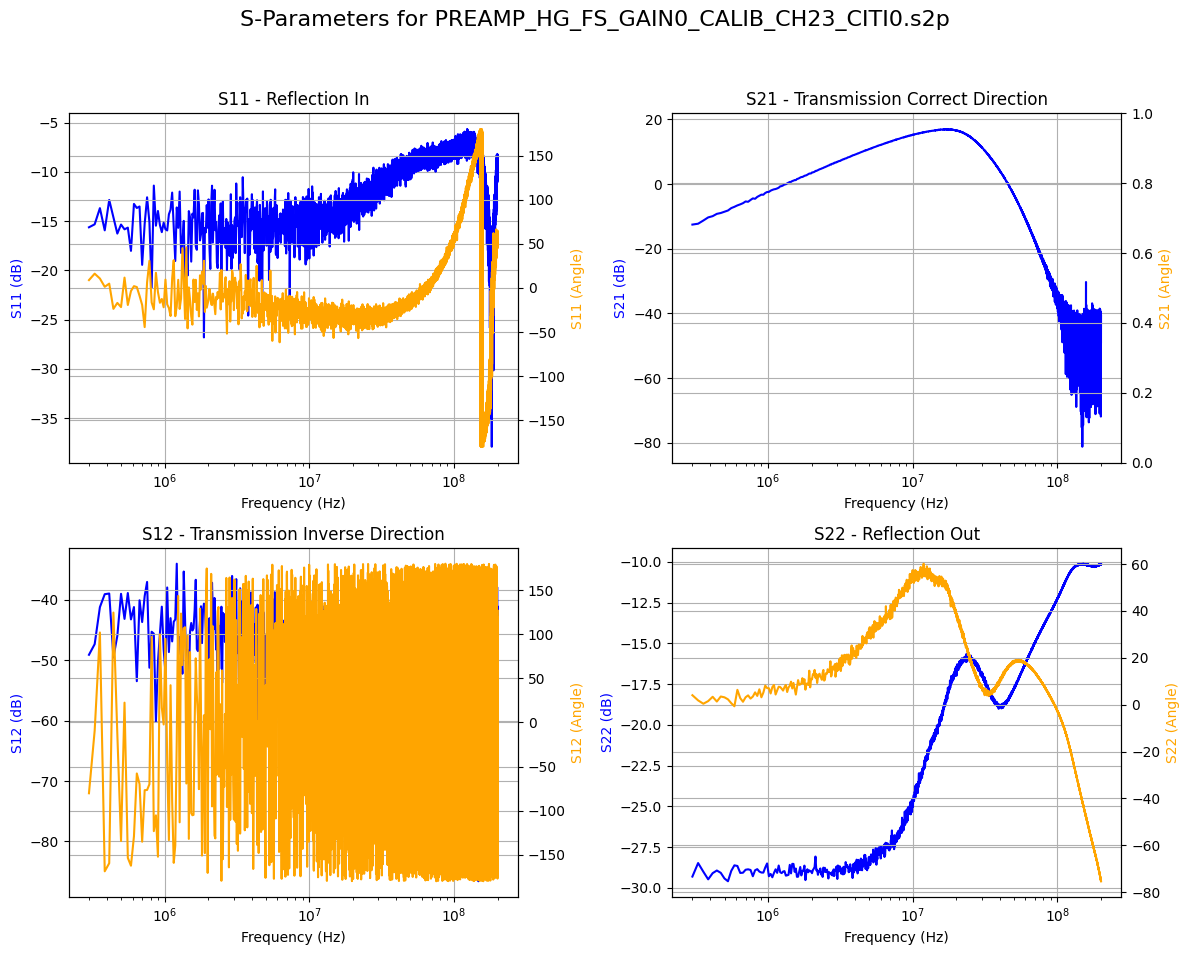

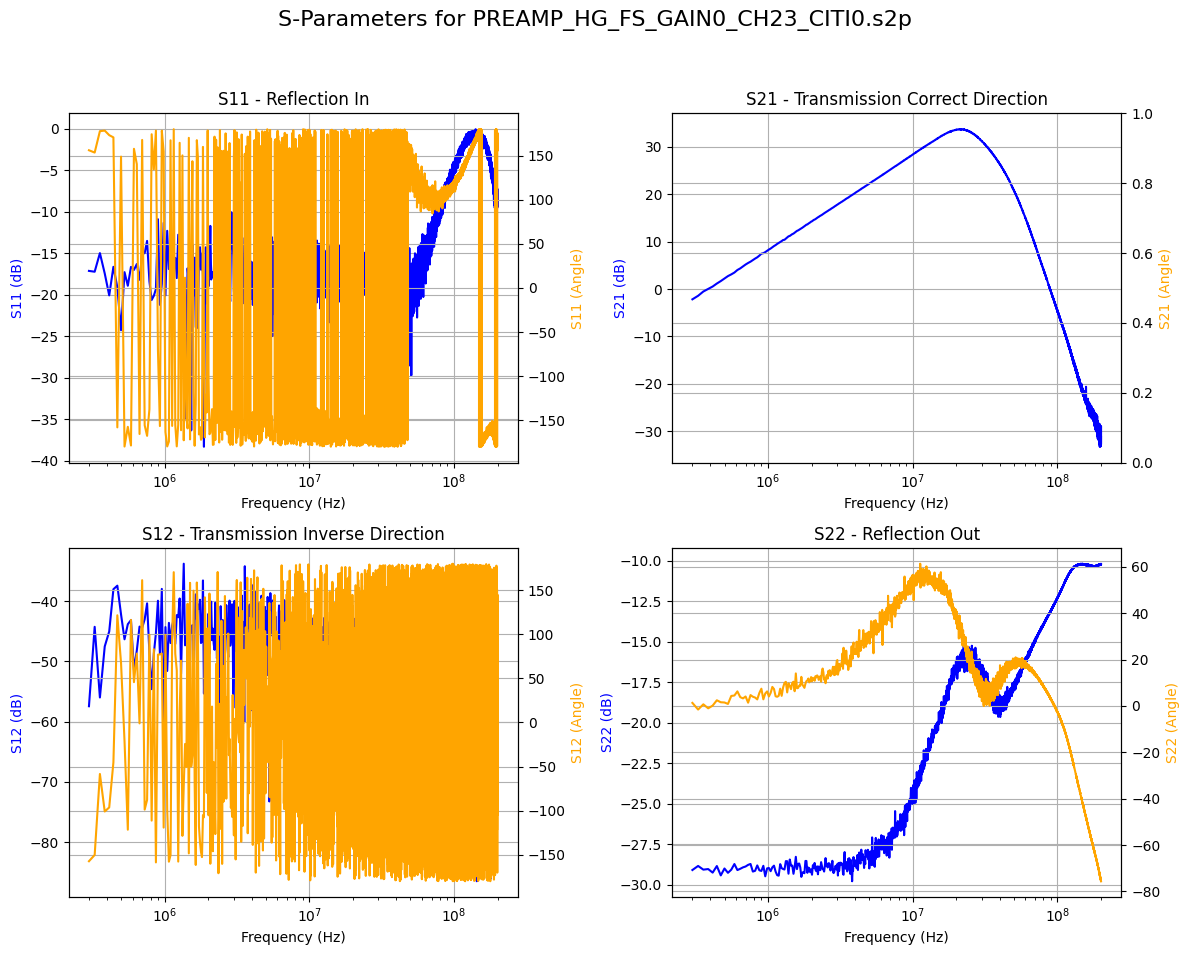

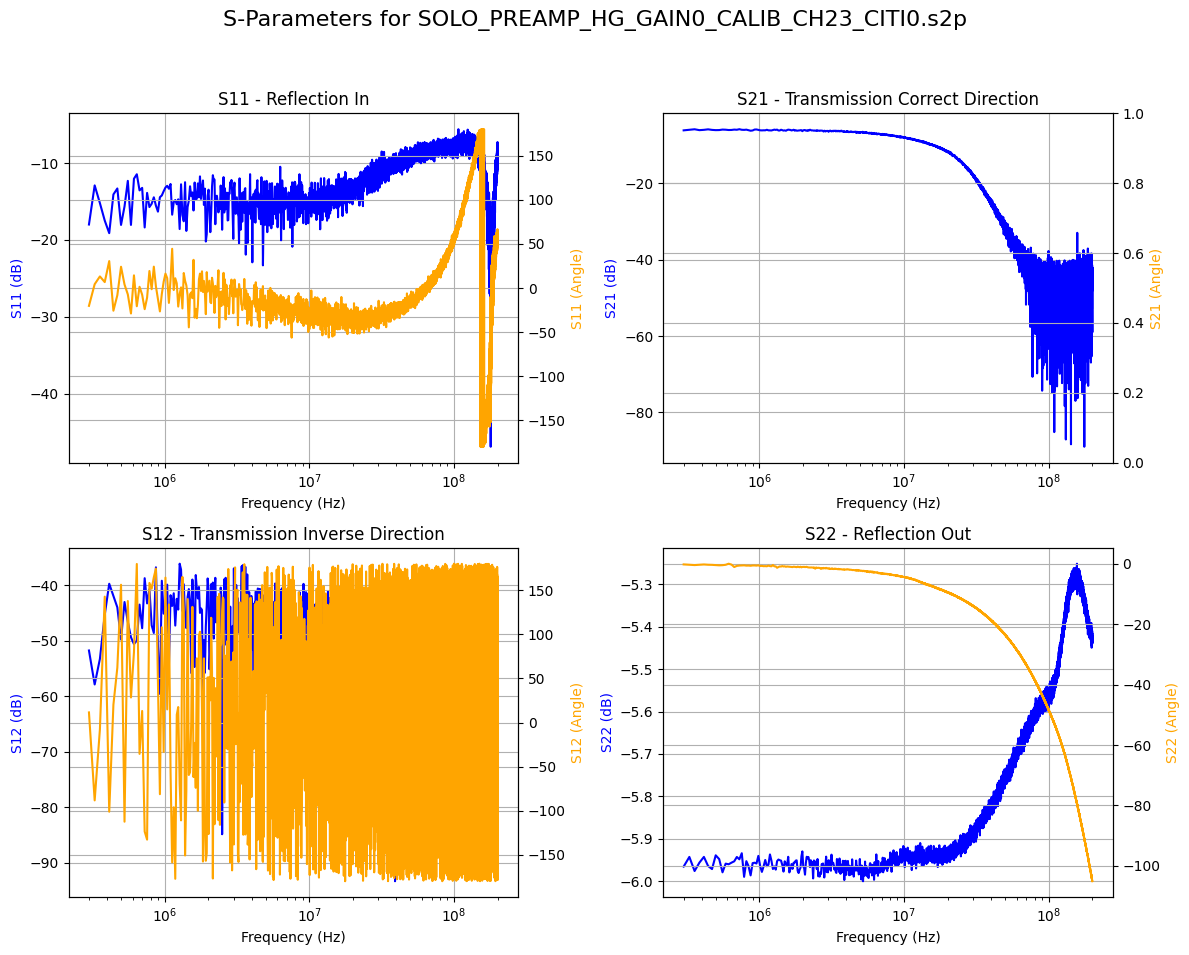

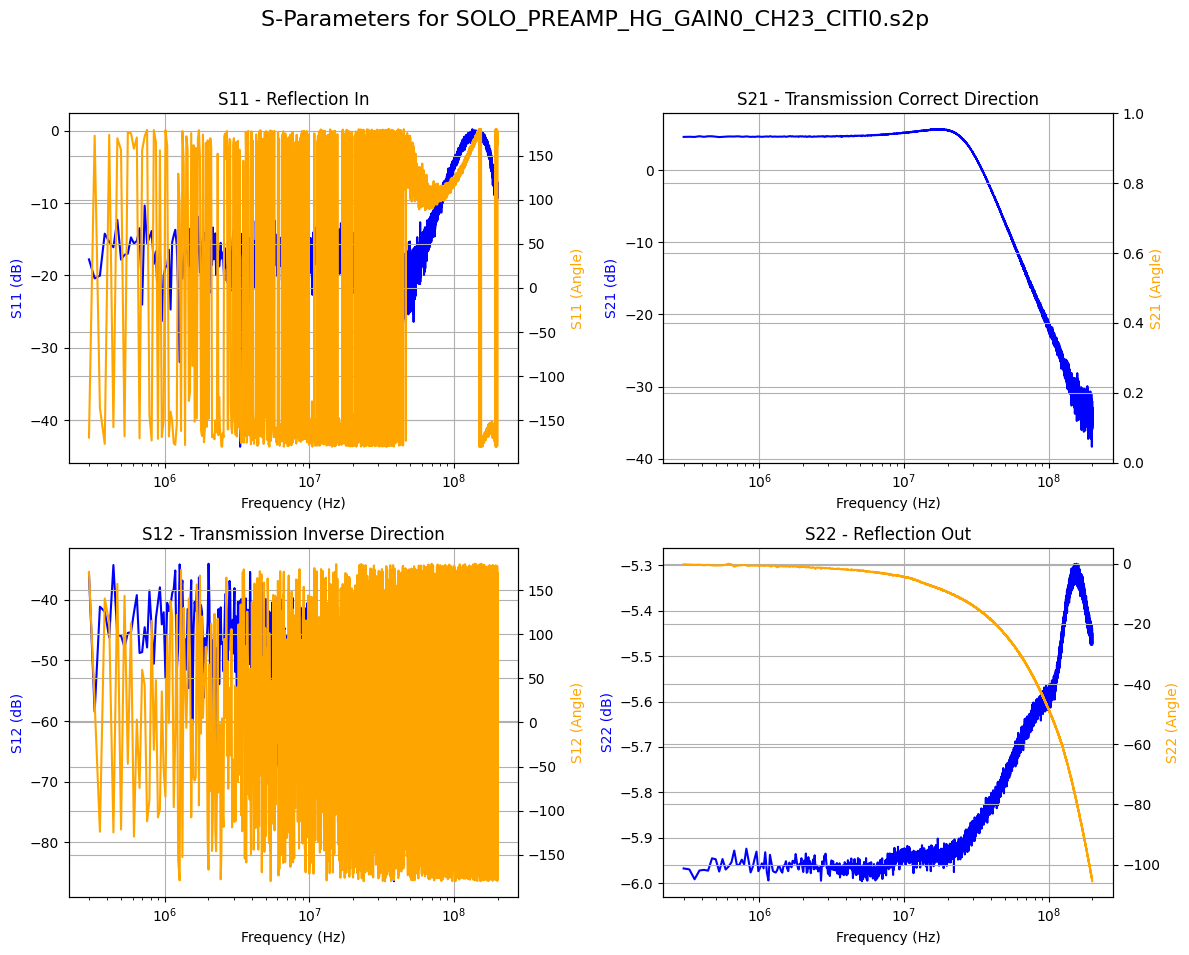

In [12]:
# Directory containing the .s2p files
directory = r'C:\Users\smili\OneDrive\Documents\GitHub\Laboratorio_6_7_ITeDA\Mediciones\Mediciones CITI VNA\2024-09-20'

# Loop over all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".s2p"):
        file_path = os.path.join(directory, filename)
        
        # Read the .s2p file
        df = read_s2p_file(file_path)
        
        # Plot the data for this file
        plot_s_parameters_dual_axis(df, filename)


In [31]:
import numpy as np

max_y = max(df['S21 (dB)'])  # Find the maximum y value


# Use np.isclose to compare floating-point values
max_x = df['Frequency (Hz)'][np.isclose(df['S21 (dB)'], max_y)].iloc[0]  # Get the first match for max_y
print(max_x, max_y)


17134262.0374 16.9699103397


In [32]:
max_x = 1e8
closest_index = (np.abs(df['Frequency (Hz)'] - max_x)).idxmin()
max_y = df['S21 (dB)'].iloc[closest_index]
print(max_x, max_y)


100000000.0 -35.0624036104
